# Boarder crossings in the sunny Constance

This example uses open data from Mobilithek (https://mobilithek.info/offers/-6759756997530398389 and https://mobilithek.info/offers/-7161835583190029268) to render graphs that TODO show a / no correlation between the weather conditions in Constance and the amount of vehicles crossing the border during certain weather conditions.

The question that interests us is: _What is the correlation between the amount of rainfall in Constance and the amount of bordercrossings in Constance?_

_Is there less border crossings on sunny days? Is there less border crossings on days where many bikers ar on the roads in Constance? Or is there no meaningful correlation at all?_

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [14]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load data
Create a pandas dataframe using the local sqlite file.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_TPZ = pd.read_sql_table('TPZ_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_EmZ = pd.read_sql_table('EmZ_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_bikes = pd.read_sql_table('bikes_data', 'sqlite:///../data/preprocessed-data.sqlite')
df_merged = pd.read_sql_table('merged_data', 'sqlite:///../data/preprocessed-data.sqlite')

# Calculate Total Border Crossings
df_merged['Total Border Crossings'] = df_merged['TPZCH'] + df_merged['TPZD'] + df_merged['EmZCH'] + df_merged['EmZD']

## What Influence does rain have on the amount of vehicles on the road?

To answer our initial question, we use matplotlib to draw a barchart of the amounts of vehicles and cyclists during specific weather conditions. 

- Rainy weather: equal or more then 0.1mm of rain was measured during one hour
- Sunny weather: less 0.1mm of rain measured. 

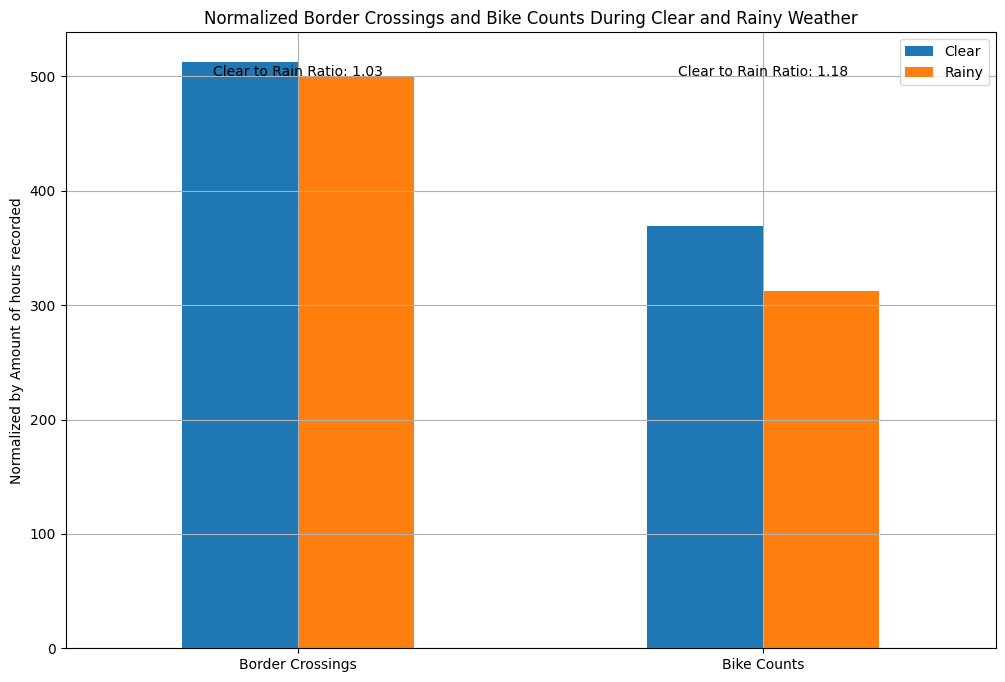

In [16]:
# Define clear and rainy conditions based on 'Regen (mm)'
clear_weather_df = df_merged[df_merged['Regen (mm)'] < 0.1]
rainy_weather_df = df_merged[df_merged['Regen (mm)'] >= 0.1]

# Clear Weather Calculations
total_border_crossings_clear = clear_weather_df[['TPZCH', 'TPZD', 'EmZCH', 'EmZD']].sum().sum()
total_bike_counts_clear = clear_weather_df['Fahrradbruecke total'].sum()

# Rainy Weather Calculations
total_border_crossings_rainy = rainy_weather_df[['TPZCH', 'TPZD', 'EmZCH', 'EmZD']].sum().sum()
total_bike_counts_rainy = rainy_weather_df['Fahrradbruecke total'].sum()

# Calculate total records
total_records_clear = len(clear_weather_df)
total_records_rainy = len(rainy_weather_df)

# Calculate normalized values for clear conditions
total_border_crossings_clear_normalized = total_border_crossings_clear / total_records_clear
total_bike_counts_clear_normalized = total_bike_counts_clear / total_records_clear

# Calculate normalized values for rainy conditions
total_border_crossings_rainy_normalized = total_border_crossings_rainy / total_records_rainy
total_bike_counts_rainy_normalized = total_bike_counts_rainy / total_records_rainy

# Calculate the ratios
ratio_clear = total_border_crossings_clear_normalized / total_border_crossings_rainy_normalized
ratio_rainy = total_bike_counts_clear_normalized / total_bike_counts_rainy_normalized

# Prepare data for the plot
weather_data = {
    'Clear': [
        total_border_crossings_clear_normalized,
        total_bike_counts_clear_normalized
    ],
    'Rainy': [
        total_border_crossings_rainy_normalized,
        total_bike_counts_rainy_normalized
    ]
}

df_weather = pd.DataFrame(weather_data, index=['Border Crossings', 'Bike Counts'])

# Create a grouped bar plot
ax = df_weather.plot(kind='bar', figsize=(12, 8))

plt.title('Normalized Border Crossings and Bike Counts During Clear and Rainy Weather')
plt.ylabel('Normalized by Amount of hours recorded')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels

# Add ratio labels to the plot
ax.text(0, df_weather.loc['Border Crossings', 'Rainy'] + 0.02, f'Clear to Rain Ratio: {ratio_clear:.2f}', ha='center')
ax.text(1, df_weather.loc['Border Crossings', 'Rainy'] + 0.02, f'Clear to Rain Ratio: {ratio_rainy:.2f}', ha='center')

plt.show()



It appears that rain has a slightly higher impact on the bikers than on the motorized vehicles.

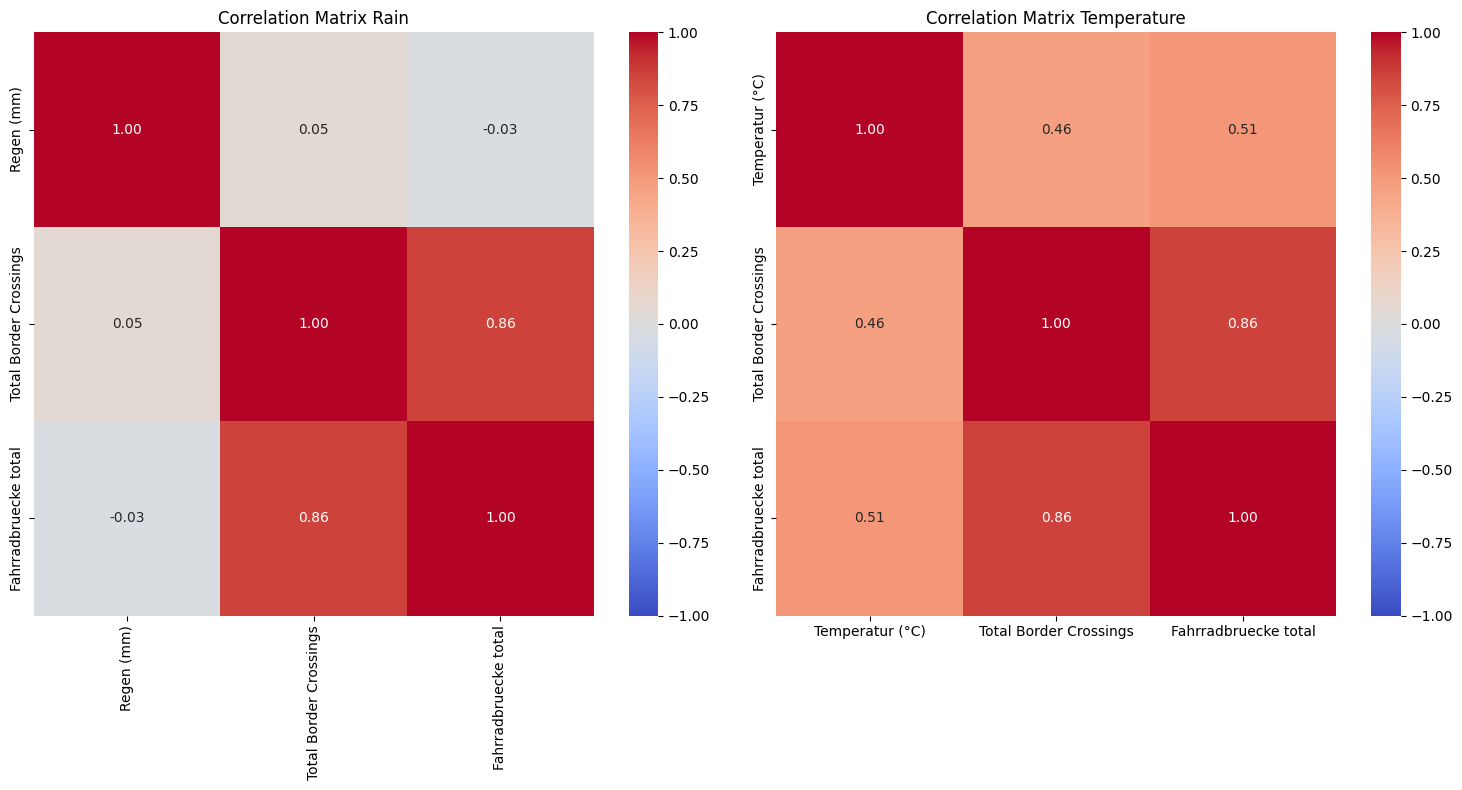

In [17]:
# Calculate correlation matrix for rainfall
corr_matrix_rain = df_merged[['Regen (mm)', 'Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create heatmap for rainfall
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(corr_matrix_rain, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axs[0])
axs[0].set_title('Correlation Matrix Rain')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally

# Calculate correlation matrix for temperature
corr_matrix_temp = df_merged[['Temperatur (°C)', 'Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create heatmap for temperature
sns.heatmap(corr_matrix_temp, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Correlation Matrix Temperature')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The influence however is marginal. Inspection of the correlation however shows that the Rain is independent from the total boarder crossings and vice versa.

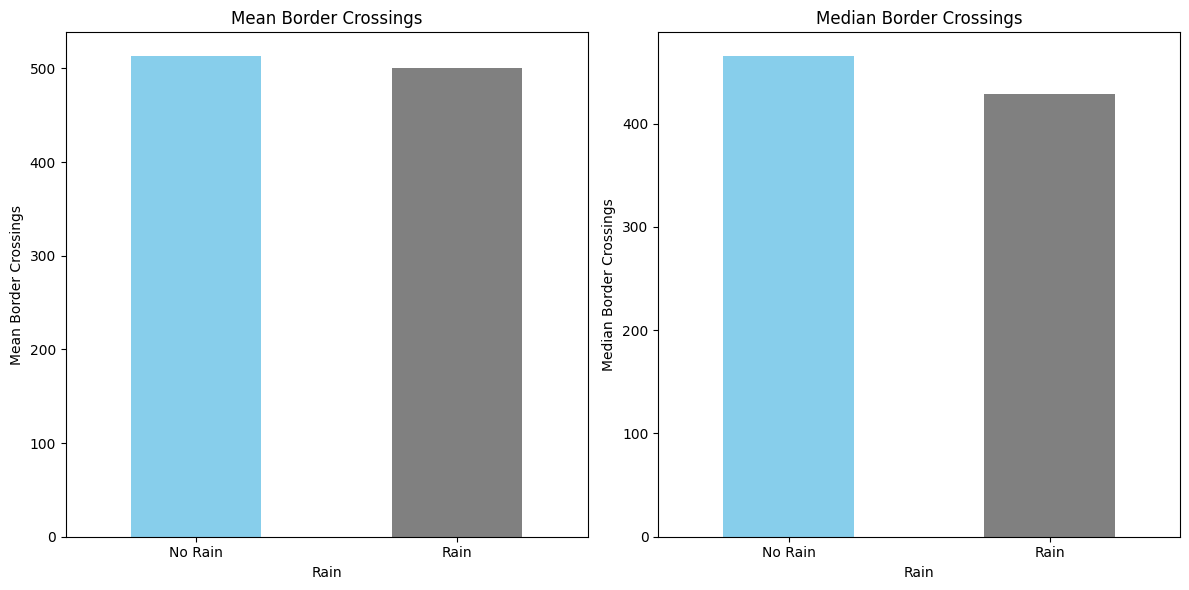

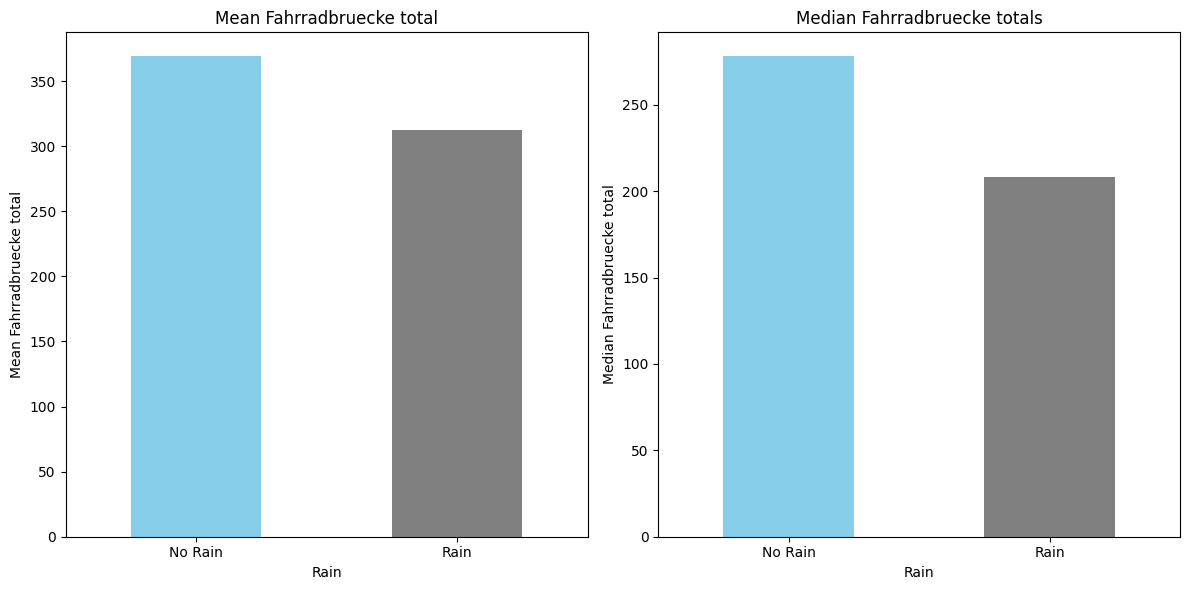

In [18]:
# Create binary rain/no rain feature
df_merged['Rain'] = df_merged['Regen (mm)'] > 0.01

# Calculate means or medians of border crossings for both rain categories
means = df_merged.groupby('Rain')['Total Border Crossings'].mean()
medians = df_merged.groupby('Rain')['Total Border Crossings'].median()

# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
means.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Mean Border Crossings')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Mean Border Crossings')

plt.subplot(1, 2, 2)
medians.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Median Border Crossings')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Median Border Crossings')

plt.tight_layout()
plt.show()


# Calculate means or medians of border crossings for both rain categories
means = df_merged.groupby('Rain')['Fahrradbruecke total'].mean()
medians = df_merged.groupby('Rain')['Fahrradbruecke total'].median()

# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
means.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Mean Fahrradbruecke total')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Mean Fahrradbruecke total')

plt.subplot(1, 2, 2)
medians.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Median Fahrradbruecke totals')
plt.xticks([0, 1], ['No Rain', 'Rain'], rotation=0)
plt.ylabel('Median Fahrradbruecke total')

plt.tight_layout()
plt.show()

## With this data, the first question can now be answered:

_What is the correlation between the amount of rainfall in Constance and the amount of bordercrossings in Constance?_

According to the data analyzed, there are only marginally less boarder crossings during rainy hours than during clear hours. It is highly likely that the amount of rainfall and the amount of bordercrossings in Constance are independent.

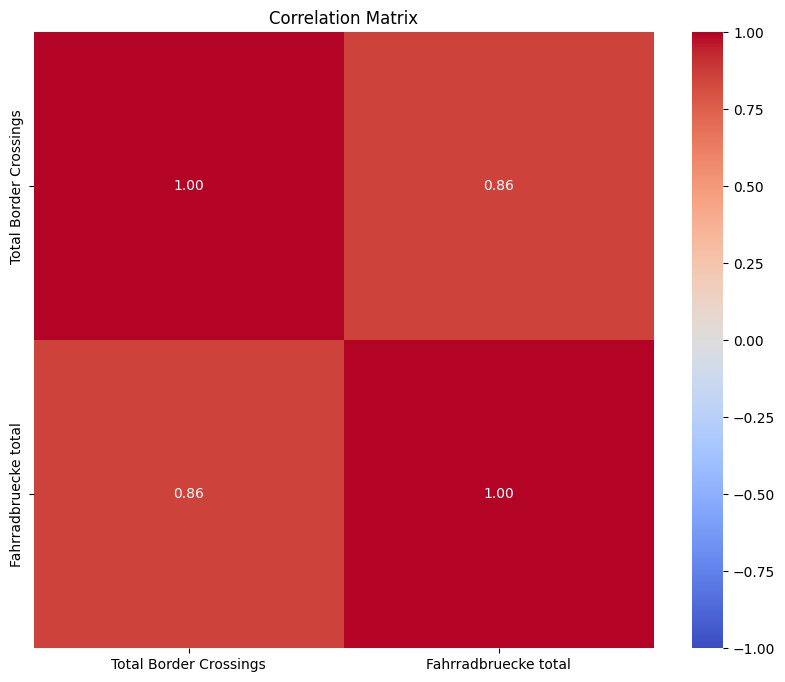

In [19]:
# Calculate correlation matrix
corr_matrix = df_merged[['Total Border Crossings', 'Fahrradbruecke total']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)  # Set vmin and vmax
plt.title('Correlation Matrix')
plt.show()


This correlation matrix shows a fairly strong positive relationship between the total boarder crossings and the total number of cyclists.

In [20]:
# Calculate the 90th percentile of 'Fahrradbruecke total'
top_10_percent_value = df_merged['Fahrradbruecke total'].quantile(0.90)

# Create a new dataframe for the days in the top 10%
df_top_10_percent_days = df_merged[df_merged['Fahrradbruecke total'] > top_10_percent_value]

# Calculate the average 'Total Border Crossings' for the top 10% days
avg_border_crossings_top_10_percent_days = df_top_10_percent_days['Total Border Crossings'].mean()

# Create a new dataframe for all other days
df_other_days = df_merged[df_merged['Fahrradbruecke total'] <= top_10_percent_value]

# Calculate the average 'Total Border Crossings' for all other days
avg_border_crossings_other_days = df_other_days['Total Border Crossings'].mean()

print(f"Average Border Crossings on top 10% most bikers observed days: {avg_border_crossings_top_10_percent_days:.0f}/h")
print(f"Average Border Crossings on all other days: {avg_border_crossings_other_days:.0f}/h")


Average Border Crossings on top 10% most bikers observed days: 1038/h
Average Border Crossings on all other days: 450/h


This further underlines the observed positive relation. This means that the next questions can be answered as well.

_Is there less border crossings on sunny days?_ 
> Quite the opposite is the case. When formulating this question I thought of comparing the vehicles observed on constances city roads to the amount of cyclists. The measures at the boarder crossings however do measure the traffic crossing the boarders, and most likely only a certain small percentage of vehicles crossing the boarder actually has constance as a target. This leads to no meaningful correlation between the two.

_Is there less border crossings on days where many bikers ar on the roads in Constance?_
> Again the opposite is observed, with the same reason as before.

_Or is there no meaningful correlation at all?_
> This is the case.



# Further Investigation

I will create some scatter plots to get another perspective on the data.

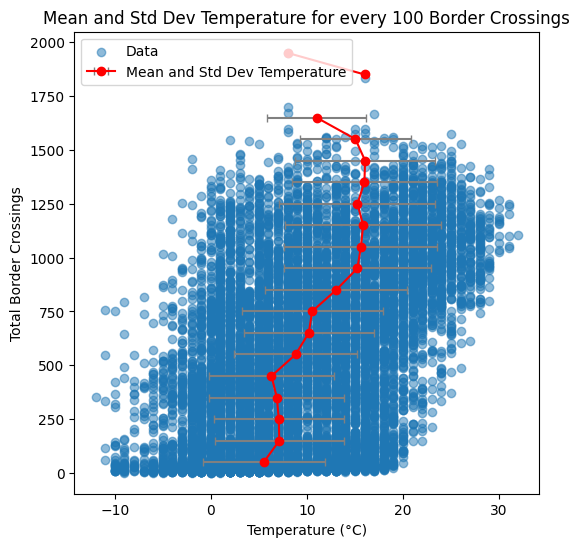

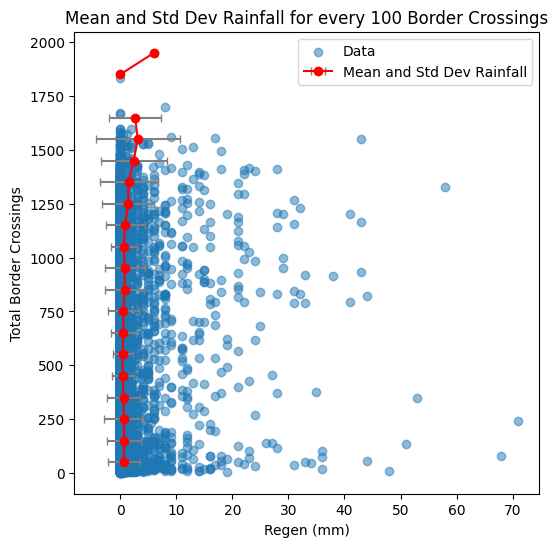

In [21]:
# Define the bins
bins = range(0, df_merged['Total Border Crossings'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Total Border Crossings' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Total Border Crossings'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Temperatur (°C)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Temperatur (°C)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Temperatur (°C)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Temperatur (°C)'], df_merged['Total Border Crossings'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Total Border Crossings'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Temperature')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Border Crossings')
plt.title('Mean and Std Dev Temperature for every 100 Border Crossings')
plt.legend()
plt.show()



# Now plot the rain to boarder crossings
# Define the bins
bins = range(0, df_merged['Total Border Crossings'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Total Border Crossings' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Total Border Crossings'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Regen (mm)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Regen (mm)'], df_merged['Total Border Crossings'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Total Border Crossings'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Rainfall')

plt.xlabel('Regen (mm)')
plt.ylabel('Total Border Crossings')
plt.title('Mean and Std Dev Rainfall for every 100 Border Crossings')
plt.legend()
plt.show()






### The human working hours can be read from the data

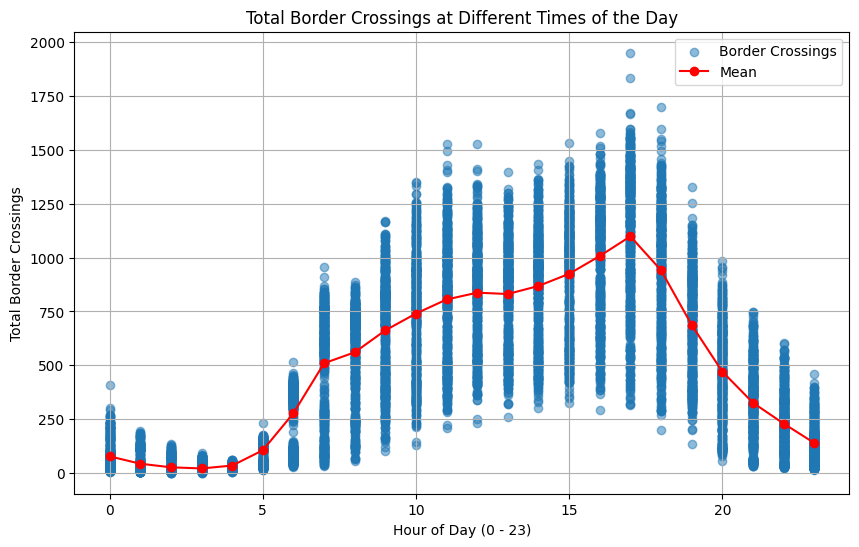

In [22]:
# Create a new column representing the hour of the day
df_merged['Hour of Day'] = df_merged['Start DateTime'].dt.hour

# Group by 'Hour of Day' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Hour of Day')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Hour of Day'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings at Different Times of the Day')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.show()



So can the impact of Sunday. The months do not really show much impact.

NameError: name 'np' is not defined

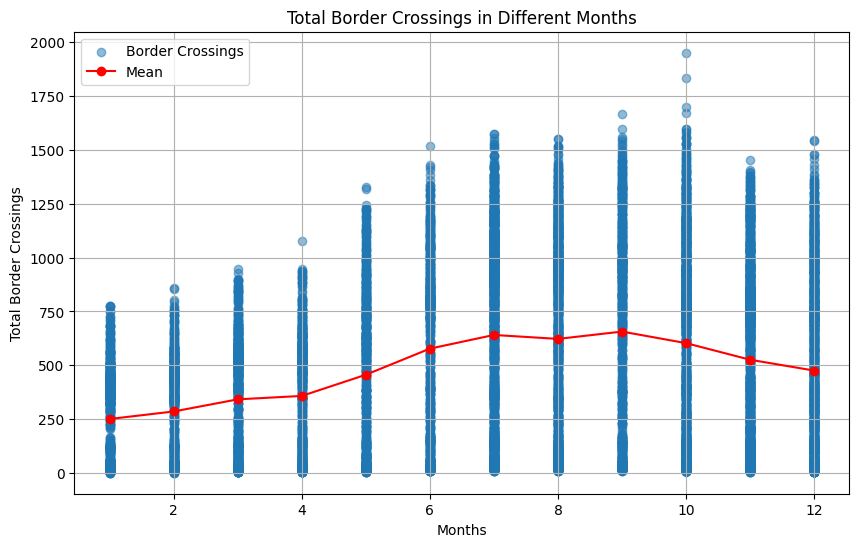

In [23]:
# Create a new column representing the month
df_merged['Month'] = df_merged['Start DateTime'].dt.month

# Group by 'Month' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Month')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Month'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Months')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings in Different Months')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Create a new column representing the weekday
df_merged['Weekday'] = df_merged['Start DateTime'].dt.weekday

# Group by 'Weekday' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Weekday')['Total Border Crossings'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Weekday'], df_merged['Total Border Crossings'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Weekday')
plt.ylabel('Total Border Crossings')
plt.title('Total Border Crossings on Different Weekdays')
plt.grid(True)

plt.legend(['Border Crossings', 'Mean'])
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()



And for the Bikers:


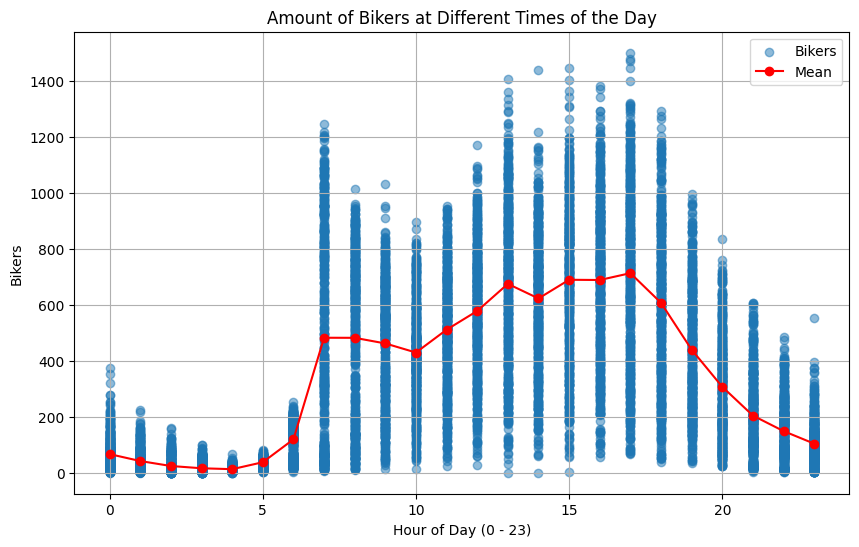

NameError: name 'np' is not defined

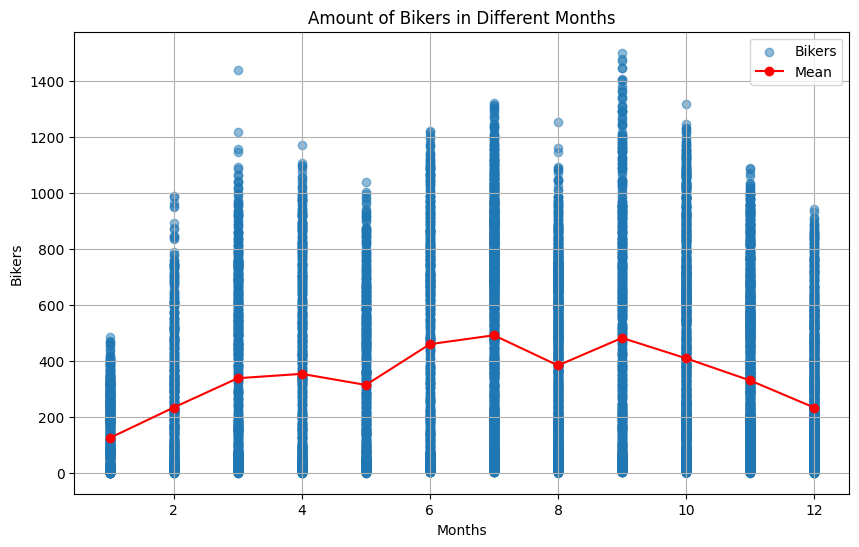

In [24]:
# Plot for Bikers over hours
# Create a new column representing the hour of the day
df_merged['Hour of Day'] = df_merged['Start DateTime'].dt.hour

# Group by 'Hour of Day' and calculate mean of 'Total Border Crossings'
mean_border_crossings = df_merged.groupby('Hour of Day')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Hour of Day'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Bikers')
plt.title('Amount of Bikers at Different Times of the Day')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.show()

# Plot for Bikers over Months
# Create a new column representing the month
df_merged['Month'] = df_merged['Start DateTime'].dt.month

# Group by 'Month' and calculate mean
mean_border_crossings = df_merged.groupby('Month')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Month'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Months')
plt.ylabel('Bikers')
plt.title('Amount of Bikers in Different Months')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot for Bikers over Week days
# Create a new column representing the weekday
df_merged['Weekday'] = df_merged['Start DateTime'].dt.weekday

# Group by 'Weekday' and calculate mean
mean_border_crossings = df_merged.groupby('Weekday')['Fahrradbruecke total'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Weekday'], df_merged['Fahrradbruecke total'], alpha=0.5)
plt.plot(mean_border_crossings.index, mean_border_crossings.values, color='red', marker='o')  # plot mean line

plt.xlabel('Weekday')
plt.ylabel('Bikers')
plt.title('Amount of Bikers on Different Weekdays')
plt.grid(True)

plt.legend(['Bikers', 'Mean'])
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


Last but not least, the ever so slightly negative correlation between rain and bike riding as a scatter plot.

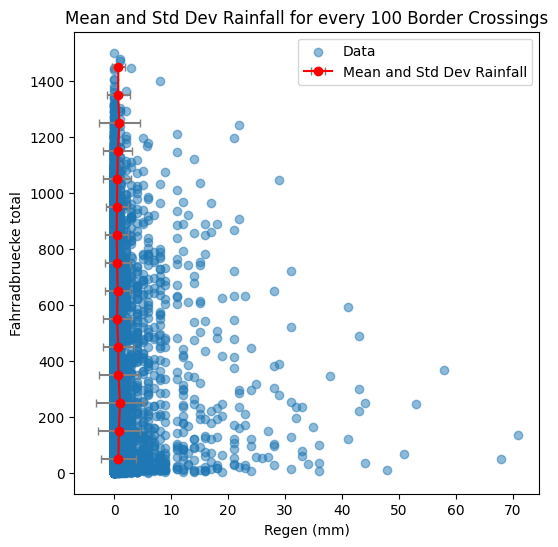

In [ ]:
# Now plot the rain to boarder crossings
# Define the bins
bins = range(0, df_merged['Fahrradbruecke total'].max() + 100, 100)

# Create a new column 'Binned Border Crossings' that categorizes 'Fahrradbruecke total' into bins
df_merged['Binned Border Crossings'] = pd.cut(df_merged['Fahrradbruecke total'], bins, include_lowest=True, right=False)

# Group by 'Binned Border Crossings' and calculate the mean and standard deviation of 'Regen (mm)'
grouped_means = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].mean()
grouped_std = df_merged.groupby('Binned Border Crossings')['Regen (mm)'].std()

plt.figure(figsize=(6,6))
plt.scatter(df_merged['Regen (mm)'], df_merged['Fahrradbruecke total'], label='Data', alpha=0.5)

# Add means and standard deviations as error bars
plt.errorbar(grouped_means, range(50, df_merged['Fahrradbruecke total'].max(), 100), 
             xerr=grouped_std, fmt='o-', color='red', ecolor='gray', capsize=3, label='Mean and Std Dev Rainfall')

plt.xlabel('Regen (mm)')
plt.ylabel('Fahrradbruecke total')
plt.title('Mean and Std Dev Rainfall for every 100 Border Crossings')
plt.legend()
plt.show()